In [62]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

### **Info**

In [64]:
import pandas as pd
import chardet

nombre_archivo = DATOS_DIR + 'Semillas.csv'

with open(nombre_archivo, 'rb') as  f:
    result = chardet.detect(f.read())

df = pd.read_csv(nombre_archivo, encoding=result["encoding"])
display(df)
df.info()
df.nunique()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         210 non-null    float64
 1   Perimetro    210 non-null    float64
 2   Compacidad   210 non-null    float64
 3   LongNucleo   210 non-null    float64
 4   AnchoNucleo  210 non-null    float64
 5   Asimetria    210 non-null    float64
 6   LongSurco    210 non-null    float64
 7   Clase        210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.3+ KB


Area           193
Perimetro      170
Compacidad     186
LongNucleo     188
AnchoNucleo    184
Asimetria      207
LongSurco      148
Clase            3
dtype: int64

### **Mapeo**

In [65]:
df = df.drop(columns=['Area', 'Perimetro']) #Para autoevaluacion

In [66]:
mapeo_tipo1={
    'Clase':{'Tipo1':1.0, 'Tipo2':0.0, 'Tipo3':0.0}
}

mapeo_tipo2={
    'Clase':{'Tipo1':0.0, 'Tipo2':1.0, 'Tipo3':0.0}
}

mapeo_tipo3={
    'Clase':{'Tipo1':0.0, 'Tipo2':0.0, 'Tipo3':1.0}
}

df_tipo1 = df.copy()
df_tipo2 = df.copy()
df_tipo3 = df.copy()

df_tipo1.replace(mapeo_tipo1, inplace=True)
df_tipo2.replace(mapeo_tipo2, inplace=True)
df_tipo3.replace(mapeo_tipo3, inplace=True)

display(df_tipo1)
display(df_tipo2)
display(df_tipo3)

C:\Users\Peter\AppData\Local\Temp\ipykernel_22848\3130046373.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tipo1.replace(mapeo_tipo1, inplace=True)
C:\Users\Peter\AppData\Local\Temp\ipykernel_22848\3130046373.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tipo2.replace(mapeo_tipo2, inplace=True)
C:\Users\Peter\AppData\Local\Temp\ipykernel_22848\3130046373.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `res

,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,0.8710,5.763,3.312,2.221,5.220,1.0
1,0.8811,5.554,3.333,1.018,4.956,1.0
2,0.9050,5.291,3.337,2.699,4.825,1.0
3,0.8955,5.324,3.379,2.259,4.805,1.0
4,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...
205,0.8783,5.137,2.981,3.631,4.870,0.0
206,0.8511,5.140,2.795,4.325,5.003,0.0
207,0.8883,5.236,3.232,8.315,5.056,0.0
208,0.8521,5.175,2.836,3.598,5.044,0.0


,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,0.8710,5.763,3.312,2.221,5.220,0.0
1,0.8811,5.554,3.333,1.018,4.956,0.0
2,0.9050,5.291,3.337,2.699,4.825,0.0
3,0.8955,5.324,3.379,2.259,4.805,0.0
4,0.9034,5.658,3.562,1.355,5.175,0.0
...,...,...,...,...,...,...
205,0.8783,5.137,2.981,3.631,4.870,0.0
206,0.8511,5.140,2.795,4.325,5.003,0.0
207,0.8883,5.236,3.232,8.315,5.056,0.0
208,0.8521,5.175,2.836,3.598,5.044,0.0


,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,0.8710,5.763,3.312,2.221,5.220,0.0
1,0.8811,5.554,3.333,1.018,4.956,0.0
2,0.9050,5.291,3.337,2.699,4.825,0.0
3,0.8955,5.324,3.379,2.259,4.805,0.0
4,0.9034,5.658,3.562,1.355,5.175,0.0
...,...,...,...,...,...,...
205,0.8783,5.137,2.981,3.631,4.870,1.0
206,0.8511,5.140,2.795,4.325,5.003,1.0
207,0.8883,5.236,3.232,8.315,5.056,1.0
208,0.8521,5.175,2.836,3.598,5.044,1.0


### **Normalizo**

In [67]:
from sklearn import preprocessing, model_selection
import numpy as np

X_tipo1 = np.array(df_tipo1.iloc[:,:-1])
T_tipo1 = np.array(df_tipo1['Clase'])

X_tipo2 = np.array(df_tipo2.iloc[:,:-1])
T_tipo2 = np.array(df_tipo2['Clase'])

X_tipo3 = np.array(df_tipo3.iloc[:,:-1])
T_tipo3 = np.array(df_tipo3['Clase'])

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_tipo1_train, X_tipo1_test, T_tipo1_train, T_tipo1_test = model_selection.train_test_split(
        X_tipo1, T_tipo1, test_size=0.30, random_state=42)

X_tipo2_train, X_tipo2_test, T_tipo2_train, T_tipo2_test = model_selection.train_test_split(
        X_tipo2, T_tipo2, test_size=0.30, random_state=42)

X_tipo3_train, X_tipo3_test, T_tipo3_train, T_tipo3_test = model_selection.train_test_split(
        X_tipo3, T_tipo3, test_size=0.30, random_state=42)

normalizador = preprocessing.StandardScaler()

X_tipo1_train = normalizador.fit_transform(X_tipo1_train)
X_tipo1_test = normalizador.transform(X_tipo1_test)

X_tipo2_train = normalizador.fit_transform(X_tipo2_train)
X_tipo2_test = normalizador.transform(X_tipo2_test)

X_tipo3_train = normalizador.fit_transform(X_tipo3_train)
X_tipo3_test = normalizador.transform(X_tipo3_test)

### **Entreno perceptron**

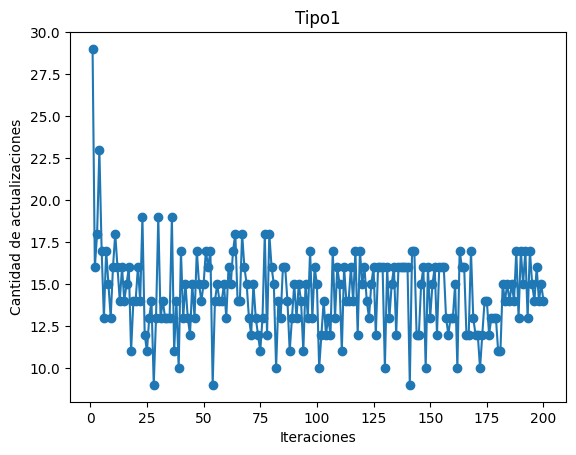

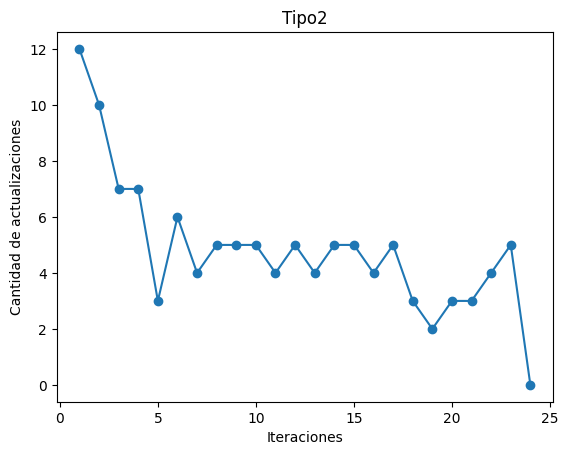

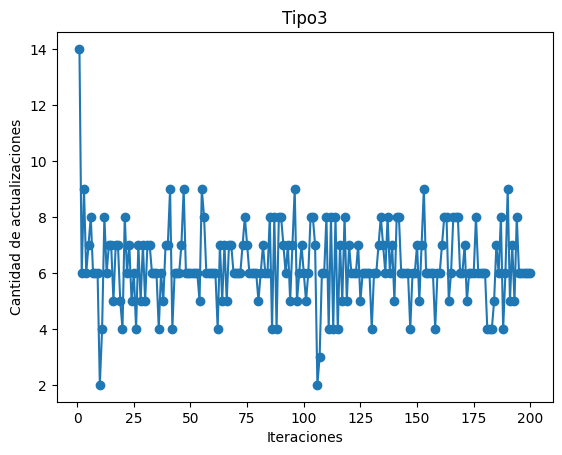

In [76]:
from ClassPerceptron import Perceptron
import matplotlib.pyplot as plt

ppn_tipo1 = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn_tipo1.fit(X_tipo1_train, T_tipo1_train)

plt.plot(range(1, len(ppn_tipo1.errors_) + 1), ppn_tipo1.errors_, marker='o')
plt.title('Tipo1')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

ppn_tipo2 = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn_tipo2.fit(X_tipo2_train, T_tipo2_train)

plt.plot(range(1, len(ppn_tipo2.errors_) + 1), ppn_tipo2.errors_, marker='o')
plt.title('Tipo2')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

ppn_tipo3 = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn_tipo3.fit(X_tipo3_train, T_tipo3_train)

plt.plot(range(1, len(ppn_tipo3.errors_) + 1), ppn_tipo3.errors_, marker='o')
plt.title('Tipo3')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

### **Verifico entrenamiento**

In [77]:
Y_tipo1_test = ppn_tipo1.predict(X_tipo1_test)
aciertos_tipo1 = sum(Y_tipo1_test == T_tipo1_test)
print("aciertos tipo1 = ", aciertos_tipo1)
print("%% de aciertos tipo1 = %.2f %%" % (100*aciertos_tipo1/X_tipo1_test.shape[0]))


Y_tipo2_test = ppn_tipo2.predict(X_tipo2_test)
aciertos_tipo2 = sum(Y_tipo2_test == T_tipo2_test)
print("aciertos tipo2 = ", aciertos_tipo2)
print("%% de aciertos tipo2 = %.2f %%" % (100*aciertos_tipo2/X_tipo2_test.shape[0]))


Y_tipo3_test = ppn_tipo3.predict(X_tipo3_test)
aciertos_tipo3 = sum(Y_tipo3_test == T_tipo3_test)
print("aciertos tipo3 = ", aciertos_tipo3)
print("%% de aciertos tipo3 = %.2f %%" % (100*aciertos_tipo3/X_tipo3_test.shape[0]))

aciertos tipo1 =  58
% de aciertos tipo1 = 92.06 %
aciertos tipo2 =  62
% de aciertos tipo2 = 98.41 %
aciertos tipo3 =  57
% de aciertos tipo3 = 90.48 %
